<a href="https://colab.research.google.com/github/ann-las/DL_project/blob/main/plot_accuracies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script recreates plots for Figure 5.

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

In [2]:
%load_ext rpy2.ipython

## Initialization

In [4]:
%%R

rm(list=ls())

#########################################################
# Authors: The Membrane Miners (s173461, abrisa, puqu)
# Date: December 2023
#
# Script to create figures for confusion matrix metrics
#########################################################

#if(!require(devtools)) install.packages("devtools") # Only necesssary for combined plots. Can be left out if it doesn't work.
#devtools::install_github("kassambara/ggpubr")

library(tidyverse)
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Error in library(ggpubr) : there is no package called ‘ggpubr’


## Define values and create tibbles

In [5]:
%%R

# ---------- Define values -----------

# Values for DeepTMHMM
deeptmhmm_type_correct_accuracies <- 0.9838051795959473
deeptmhmm_topology_accuracies <- c(0.8831169009208679, 1.0, 0.9649999737739563, 0.9800000190734863, 0.6875)
deeptmhmm_type_accuracies <- c(0.9740259647369385, 1.0, 0.9649999737739563, 0.9800000190734863, 1.0)


# Values for our model (based on micro end predictions and targets)
our_type_correct_accuracies <- 0.400
our_topology_accuracies <- c(1.0, 0.0, 0.0, 1.0, 0.0)
our_type_accuracies <- c(1.0, 0.0, 0.0, 1.0, 0.0)


# Create tibble
type_correct_tibble <- tibble(protein_type = c("Overall"),
                              DeepTMHMM = deeptmhmm_type_correct_accuracies,
                              Model = our_type_correct_accuracies) %>%
  pivot_longer(cols = c(DeepTMHMM, Model), names_to = "Model", values_to = "value")

top_accuracies_tibble <- tibble(protein_type = c("TM", "TM + SP", "SP", "Glob", "Beta"),
                               DeepTMHMM = deeptmhmm_topology_accuracies,
                               Model = our_topology_accuracies) %>%
  pivot_longer(cols = c(DeepTMHMM, Model), names_to = "Model", values_to = "value")

type_accuracies_tibble <- tibble(protein_type = c("TM", "TM + SP", "SP", "Glob", "Beta"),
                                DeepTMHMM = deeptmhmm_type_accuracies,
                                Model = our_type_accuracies) %>%
  pivot_longer(cols = c(DeepTMHMM, Model), names_to = "Model", values_to = "value")


## Plots

In [6]:
%%R

# Make plot for topology
top_plot <- ggplot(data = top_accuracies_tibble, mapping = aes(x = factor(protein_type, levels = c("TM", "TM + SP", "SP", "Glob", "Beta")), y = value*100, fill = factor(Model, levels = c("Model", "DeepTMHMM")))) +
  geom_col(position = "dodge") +
  theme_classic() +
  xlab("") +
  ylab("% topology accuracy") +
  scale_y_continuous(breaks = round(seq(0, 100 , by = 10))) +
  theme(legend.position = "none")

In [7]:
%%R

# Make plot for overall
overall_plot <- ggplot(data = type_correct_tibble, mapping = aes(x = factor(protein_type), y = value*100, fill = factor(Model, levels = c("Model", "DeepTMHMM")))) +
  geom_col(position = "dodge") +
  theme_classic() +
  xlab("  ") +
  ylab("Type accuracy") + # Maybe add this to overall
  scale_y_continuous(breaks = round(seq(0, 100 , by = 10))) +
  theme(axis.text.y=element_blank(),axis.ticks=element_blank(),
        axis.title.y=element_blank(),
        #legend.position="none",
        axis.line.y = element_blank(),
        legend.title = element_blank())

In [8]:
%%R

# Make plot for type
type_plot <- ggplot(data = type_accuracies_tibble, mapping = aes(x = factor(protein_type, levels = c("TM", "TM + SP", "SP", "Glob", "Beta")), y = value*100, fill = factor(Model, levels = c("Model", "DeepTMHMM")))) +
  geom_col(position = "dodge") +
  theme_classic() +
  xlab(" ") +
  ylab("% type accuracy") +
  scale_y_continuous(breaks = round(seq(0, 100 , by = 10))) +
  theme(legend.position="none",
        legend.title = element_blank())

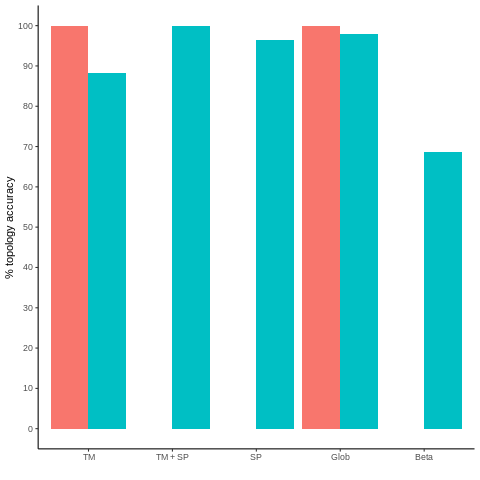

In [9]:
%%R

top_plot

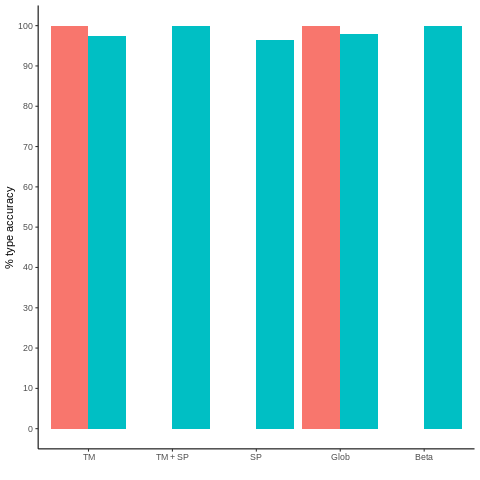

In [11]:
%%R
#ggarrange(type_plot, overall_plot, common.legend = TRUE, legend = "bottom", widths = c(8,2))
type_plot

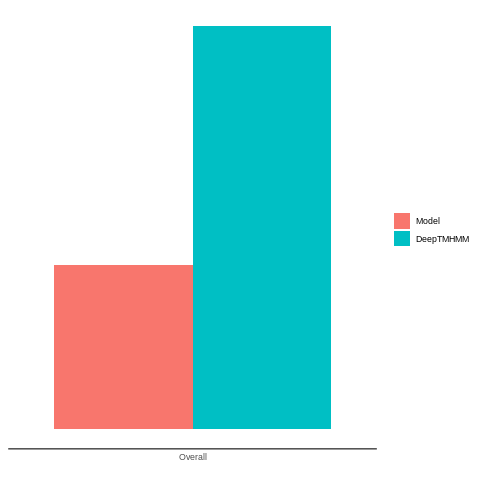

In [13]:
%%R

overall_plot